## Observations and Insights 

Observations:
    
-The data:
    The data for Capomulin and Ramicane treatment is normally distributed. 
    Also the data for these two treatments has the least variability with standard deviations 
    and standard errors being the smallest compare to the other treatments.

-Analysis of the whisker plots:
    The mice who followed Capomulin and Ramicane treatment have the smallest tumor volume size at the end of the treatment -
    the median volume is respectively 38.12mm3 and 36.56mm3 (compare to the tumors volume of the other treatments Infubinol and Ceftamin close to 60mm3).
    
-Analysis of the mouse s185 with Capomulin treatment:
    We can conclude Capomulin treatment has been effective on mouse s185. The tumor volume reduced almost by half between the start and the final timepoint of the treatment.

-Correlation between weight and tumor volume on the Capomulin regimen:
    There is a strong positive correlation between weight and tumor size - correlation coefficient is 0.84.
    This means the bigger the mouse is, the bigger the tumor volume is.    

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = len(combined_df["Mouse ID"].value_counts())
print("The number of mice is:", number_mice)

The number of mice is: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = combined_df[combined_df.duplicated(["Mouse ID","Timepoint"], keep=False)]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Mouse_g989 = combined_df.loc[combined_df["Mouse ID"]=='g989']
Mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df["Mouse ID"]!='g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = len(clean_df["Mouse ID"].value_counts())
print("The number of mice in the clean DataFrame is:", number_mice_clean)

The number of mice in the clean DataFrame is: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Used the second technique below.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
drug = clean_df.groupby("Drug Regimen")
new_df = pd.DataFrame(drug["Tumor Volume (mm3)"].count())

#Renaming first column
new_df.columns=["Count"]

#Calculating the mean and placing it into a new column named "Mean" in the new_df
mean_drug = pd.DataFrame(drug["Tumor Volume (mm3)"].mean())
new_df["Mean"] = mean_drug

#Calculating the median and placing it into a new column named "Median" in the new_df
median_drug = pd.DataFrame(drug["Tumor Volume (mm3)"].median())
new_df["Median"] = median_drug

#Calculating the variance and placing it into a new column named "Variance" in the new_df
variance_drug = pd.DataFrame(drug["Tumor Volume (mm3)"].var())
new_df["Variance"] = variance_drug

#Calculating the standard deviation and placing it into a new column named "Std Dev" in the new_df
std_drug = pd.DataFrame(drug["Tumor Volume (mm3)"].std())
new_df["Std Dev"] = std_drug

#Calculating the Standard error and placing it into a new column named "SEM" in the new_df
sem_drug = pd.DataFrame(drug["Tumor Volume (mm3)"].sem())
new_df["SEM"] = sem_drug

#Formatting the data with two decimals:
new_df["Mean"]=new_df["Mean"].map("{:,.2f}".format)
new_df["Median"]=new_df["Median"].map("{:,.2f}".format)
new_df["Variance"]=new_df["Variance"].map("{:,.2f}".format)
new_df["Std Dev"]=new_df["Std Dev"].map("{:,.2f}".format)
new_df["SEM"]=new_df["SEM"].map("{:,.2f}".format)

#Displaying the summary table 'new_df':
new_df 


,Count,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,,
Capomulin,230,40.68,41.56,24.95,4.99,0.33
Ceftamin,178,52.59,51.78,39.29,6.27,0.47
Infubinol,178,52.88,51.82,43.13,6.57,0.49
Ketapril,188,55.24,53.70,68.55,8.28,0.60
Naftisol,186,54.33,52.51,66.17,8.13,0.60
Placebo,181,54.03,52.29,61.17,7.82,0.58
Propriva,148,52.32,50.45,43.85,6.62,0.54
Ramicane,228,40.22,40.67,23.49,4.85,0.32
Stelasyn,181,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

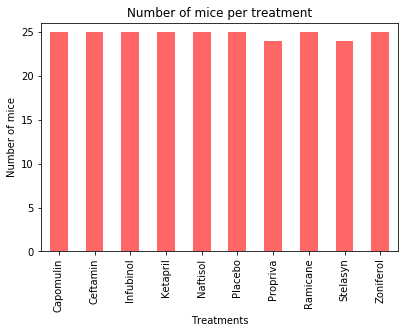

<Figure size 432x288 with 0 Axes>

In [53]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

#Using the same group by function named 'drug' to create our DataFrame and count the number of mice
drug = clean_df.groupby("Drug Regimen")
mouse_df = pd.DataFrame(drug["Mouse ID"].value_counts())
#Rename column of mouse_df
mouse_df.columns=["Count"]
#Group mouse_df by Drug Regimen and count the number of mice per Drug Regimen
mouse_count = mouse_df.groupby("Drug Regimen")
mouse_count_df = pd.DataFrame(mouse_count["Count"].count())

#Plotting the bar chart:
mouse_count_df.plot(kind="bar", facecolor="red", alpha=0.6, figsize=(6.4,4.2), legend = None)
# Set textual properties
plt.title("Number of mice per treatment")
plt.ylabel("Number of mice")
plt.xlabel("Treatments")
plt.xlim(-0.5,len(mouse_count_df)-0.5)
plt.ylim(0,max(mouse_count_df.Count)+1)
# Show plot
plt.show()
plt.tight_layout()

<function matplotlib.pyplot.show(*args, **kw)>

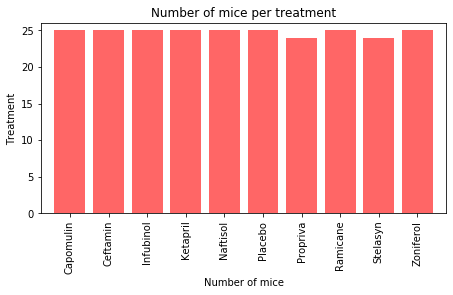

In [51]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Reset the index of dataframe mouse_count_df
mouse_index = mouse_count_df.reset_index()
mouse_index

#Set the axis and tick locations
x_axis = mouse_index["Drug Regimen"]
y_axis = mouse_index["Count"]
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6.4,4.2))
plt.bar(x_axis, y_axis, color='r', alpha=0.6, align="center")
plt.xticks(tick_locations, mouse_index["Drug Regimen"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)

# Set a Title and labels
plt.title("Number of mice per treatment")
plt.xlabel("Number of mice")
plt.ylabel("Treatment")

# Save our graph and show the grap
plt.tight_layout()
plt.show

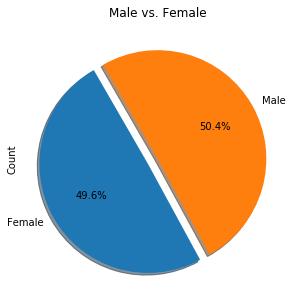

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Use group by function to analyse female versus male mice
sex = clean_df.groupby("Sex")
sex_df = pd.DataFrame(sex["Mouse ID"].value_counts())
#Rename column to Count
sex_df.columns = ["Count"]
#Use group by function to see the total number of mice
sex_count = sex_df.groupby("Sex")
sex_count_series = sex_count["Count"].count()

#Creating the pie chart using Pandas
sex_count_chart = sex_count_series.plot(kind='pie', explode = (0.1,0), autopct="%1.1f%%", shadow=True, 
                                        startangle=120,figsize=(7,5), title="Male vs. Female")
plt.show()

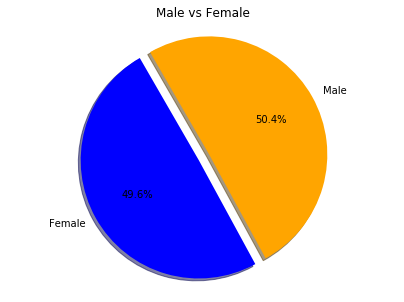

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
values =[123,125]
colours= ["Blue","Orange"]
explode = (0.1,0)
# Tell matplotlib to create a pie chart based upon the above data
plt.figure(figsize=(7,5))
plt.pie(values, explode=explode,labels = labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=120)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
#Write a title
plt.title("Male vs Female")
# Print the final chart
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#Droping the duplicates from clean_df except the last value to be able to get the last timepoint for each mouse
last_timepoint = clean_df.drop_duplicates(["Mouse ID"], keep='last')
last_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#The technique above has already identified the Tumor Volume(mm3) at the last time point.
#Refining the Data for only four treatments - Capomulin, Ramicane, Infubinol, and Ceftamin

four_treatments = last_timepoint.loc[(last_timepoint["Drug Regimen"]=="Capomulin")|
                                    (last_timepoint["Drug Regimen"]=="Ramicane") |
                                    (last_timepoint["Drug Regimen"]=="Infubinol") |
                                    (last_timepoint["Drug Regimen"]=="Ceftamin") ]
four_treatments.head()                              

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

lowerq = []
upperq = []
iqr = []
median = []
lower_bound = []
upper_bound = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Locate the data for the four treatments from four_treatments dataFrame
tumor_Capomulin = (four_treatments.loc[four_treatments["Drug Regimen"]=="Capomulin"])["Tumor Volume (mm3)"]
tumor_Ramicane = (four_treatments.loc[four_treatments["Drug Regimen"]=="Ramicane"])["Tumor Volume (mm3)"]
tumor_Ceftamin = (four_treatments.loc[four_treatments["Drug Regimen"]=="Ceftamin"])["Tumor Volume (mm3)"]
tumor_Infubinol = (four_treatments.loc[four_treatments["Drug Regimen"]=="Infubinol"])["Tumor Volume (mm3)"]

data = [tumor_Capomulin,tumor_Ramicane,tumor_Infubinol,tumor_Ceftamin]

#Using a loop to calculate data for the four treatments:
for d in data:
    quartiles = d.quantile([.25,.5,.75])
    lq = quartiles[0.25]
    uq = quartiles[0.75]
    IQR =uq-lq
    l_bound = lq - (1.5*IQR)
    u_bound = uq + (1.5*IQR)
    lowerq.append(lq)
    upperq.append(uq)
    iqr.append(IQR)
    median.append(quartiles[0.5])
    lower_bound.append(l_bound)
    upper_bound.append(u_bound)

df = pd.DataFrame({
    "Treatment": treatments,
    "Lower quartile" : lowerq,
    "Upper quartile": upperq,
    "IQR": iqr,
    "Median": median,
    "Lower bound" : lower_bound,
    "Upper bound" : upper_bound
})
    
df

,Treatment,Lower quartile,Upper quartile,IQR,Median,Lower bound,Upper bound
0,Capomulin,32.377357,40.159220,7.781863,38.125164,20.704562,51.832015
1,Ramicane,31.560470,40.659006,9.098537,36.561652,17.912664,54.306811
2,Infubinol,54.048608,65.525743,11.477135,60.165180,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,59.851956,25.355450,87.666458


In [16]:
# Determine outliers using upper and lower bounds
#Capomulin outliers
cap_data = four_treatments.loc[four_treatments["Drug Regimen"] == "Capomulin"]
cap_outliers =  cap_data.loc[(cap_data["Tumor Volume (mm3)"] > df.iloc[0,6]) |
                             (cap_data["Tumor Volume (mm3)"]< df.iloc[0,5])]
cap_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [17]:
#Ramicane outliers
ram_data = four_treatments.loc[four_treatments["Drug Regimen"] == "Ramicane"]
ram_outliers =  ram_data.loc[(ram_data["Tumor Volume (mm3)"] > df.iloc[1,6]) |
                             (ram_data["Tumor Volume (mm3)"]< df.iloc[1,5])]
ram_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [18]:
#Infubinol outliers
inf_data = four_treatments.loc[four_treatments["Drug Regimen"] == "Infubinol"]
inf_outliers =  inf_data.loc[(inf_data["Tumor Volume (mm3)"] > df.iloc[2,6]) |
                             (inf_data["Tumor Volume (mm3)"]< df.iloc[2,5])]
inf_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


In [19]:
#Ceftamin outliers
cef_data = four_treatments.loc[four_treatments["Drug Regimen"] == "Ceftamin"]
cef_outliers =  cef_data.loc[(cef_data["Tumor Volume (mm3)"] > df.iloc[3,6]) |
                             (cef_data["Tumor Volume (mm3)"]< df.iloc[3,5])]
cef_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


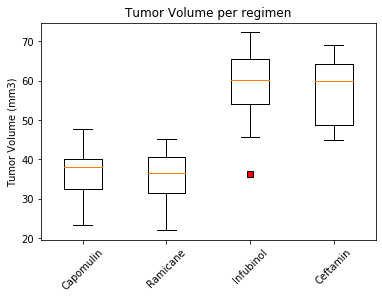

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [tumor_Capomulin,tumor_Ramicane,tumor_Infubinol,tumor_Ceftamin]
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
red_square = dict(markerfacecolor='r', marker='s')

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume per regimen')
ax1.set_xticklabels(Treatments, rotation=45, fontsize=10)
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data, flierprops=red_square)
plt.show()

## Line and Scatter Plots

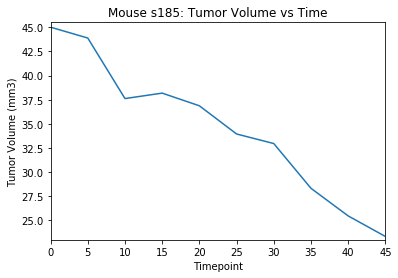

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Identify the data of mouse s185 in clean_df
mouse_s185 = clean_df.loc[clean_df["Mouse ID"]=="s185"]
mouse_s185
#Plot time point versus tumor volume
x_axis = mouse_s185["Timepoint"]
y_axis = mouse_s185["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,45)
plt.ylim(23,45.5)
plt.title("Mouse s185: Tumor Volume vs Time")
plt.show()
plt.tight_layout()

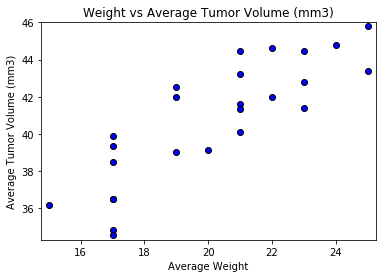

In [61]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Select the data for the Capomulin regimen:
capomulin = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]

#Group by mouse ID
cap_group = capomulin.groupby("Mouse ID")
average_weight = cap_group["Weight (g)"].mean()
average_weight
average_tumor = cap_group["Tumor Volume (mm3)"].mean()
average_tumor

#Scatter Plot mouse weight vs Average Tumor Volume
x_axis = average_weight
y_axis = average_tumor
plt.scatter(x_axis,y_axis, color = 'b', edgecolors="black")
plt.xlabel("Average Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume (mm3)")
plt.xlim(14.75,25.25)
plt.ylim(34.3,46)
plt.show()

## Correlation and Regression

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation coefficient:
print(f"The correlation coefficient between weight and Average Tumor Volume (mm3) is {round(st.pearsonr(average_weight,average_tumor)[0],2)}")

#Linear regression model:
x_values = average_weight
y_values = average_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression equation is : {line_eq}")

The correlation coefficient between weight and Average Tumor Volume (mm3) is 0.84
The linear regression equation is : y = 0.95x + 21.55


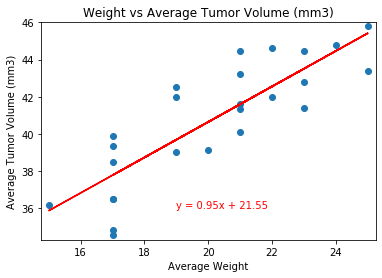

In [28]:
#Plotting the regression line on the scatter plot:
#Scatter Plot mouse weight vs Average Tumor Volume
x_axis = average_weight
y_axis = average_tumor
plt.scatter(x_axis,y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,36),fontsize=10,color="red")
plt.xlabel("Average Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume (mm3)")
plt.xlim(14.75,25.25)
plt.ylim(34.3,46)
plt.show()